In [15]:
import obspy 
from obspy import UTCDateTime, Stream, Trace, read
import matplotlib.pyplot as plt

In [200]:
st_upper = read('Model_mseed/20221114_103707/*mseed')
st_lower = read('Model_mseed/20221114_103909/*mseed')
st_two = read('Model_mseed/20221114_104127/*mseed')

In [201]:
baz = 270
fmin = 0.05
fmax = 5

In [202]:
st_upper_r = st_upper.copy()
st_upper_r = st_upper_r.rotate('NE->RT',back_azimuth=baz)
st_upper_r.filter('bandpass',freqmin=fmin, freqmax=fmax, corners=4, zerophase= True)
st_lower_r = st_lower.copy()
st_lower_r = st_lower_r.rotate('NE->RT',back_azimuth=baz)
st_lower_r.filter('bandpass',freqmin=fmin, freqmax=fmax, corners=4, zerophase= True)
st_two_r = st_two.copy()
st_two_r = st_two_r.rotate('NE->RT',back_azimuth=baz)
st_two_r.filter('bandpass',freqmin=fmin, freqmax=fmax, corners=4, zerophase= True)

3 Trace(s) in Stream:
XX.MOD..HHT | 2022-11-14T10:41:27.000000Z - 2022-11-14T10:44:26.950000Z | 20.0 Hz, 3600 samples
XX.MOD..HHR | 2022-11-14T10:41:27.000000Z - 2022-11-14T10:44:26.950000Z | 20.0 Hz, 3600 samples
XX.MOD..HHZ | 2022-11-14T10:41:27.000000Z - 2022-11-14T10:44:26.950000Z | 20.0 Hz, 3600 samples

(45.0, 50.0)

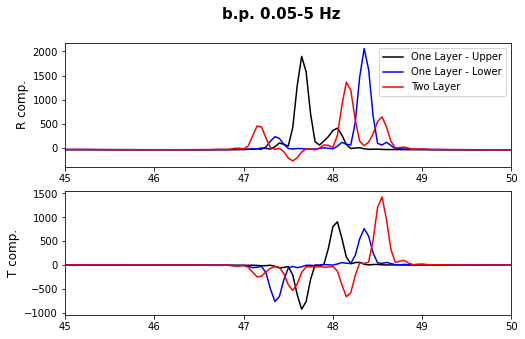

In [203]:
plt.figure(figsize=(8,5))
plt.suptitle(f'b.p. {fmin}-{fmax} Hz', fontsize=15, fontweight='bold')
plt.subplot(211)
plt.plot(st_upper_r[1].times(), st_upper_r[1].data, 'k', label='One Layer - Upper')
plt.plot(st_lower_r[1].times(), st_lower_r[1].data, 'b', label='One Layer - Lower')
plt.plot(st_two_r[1].times(), st_two_r[1].data, 'r', label='Two Layer')
plt.xlim(45,50)
plt.ylabel('R comp.', fontsize=12)
plt.legend()

plt.subplot(212)
plt.plot(st_upper_r[0].times(), st_upper_r[0].data, 'k', label='One Layer - Upper')
plt.plot(st_lower_r[0].times(), st_lower_r[0].data, 'b', label='One Layer - Lower')
plt.plot(st_two_r[0].times(), st_two_r[0].data, 'r', label='Two Layer')
plt.ylabel('T comp.', fontsize=12)
plt.xlim(45,50)

# plt.savefig(f'Waveform-{fmin}-{fmax}Hz.png',dpi=200)

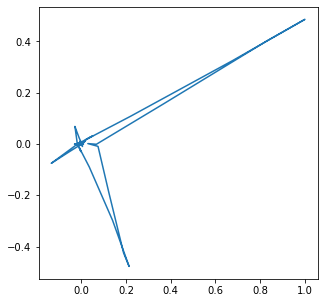

In [219]:
qqq = st_upper.copy()
qqq.filter('bandpass',freqmin=fmin, freqmax=fmax, corners=4, zerophase= True)
starttime = qqq[0].stats.starttime
qqq.slice(starttime=starttime+46.5,endtime=starttime+49 )

plt.figure(figsize=(5,5))
pmax = max(max(qqq[0].data),max(qqq[1].data))
plt.plot(qqq[0].data/pmax,qqq[1].data/pmax)

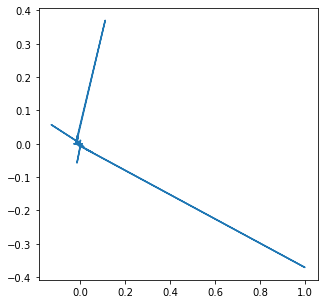

In [220]:
qqq = st_lower.copy()
qqq.filter('bandpass',freqmin=fmin, freqmax=fmax, corners=4, zerophase= True)
starttime = qqq[0].stats.starttime
qqq.slice(starttime=starttime+46.5,endtime=starttime+49 )

plt.figure(figsize=(5,5))
pmax = max(max(qqq[0].data),max(qqq[1].data))
plt.plot(qqq[0].data/pmax,qqq[1].data/pmax)

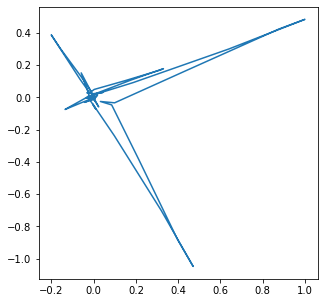

In [210]:
qqq = st_two.copy()
qqq.filter('bandpass',freqmin=fmin, freqmax=fmax, corners=4, zerophase= True)
starttime = qqq[0].stats.starttime
qqq.slice(starttime=starttime+46.5,endtime=starttime+49 )

plt.figure(figsize=(5,5))
pmax = max(max(qqq[0].data),max(qqq[1].data))
plt.plot(qqq[0].data/pmax,qqq[1].data/pmax)